# Переобучение

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [2]:
data = pd.read_csv("/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv", sep=',')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


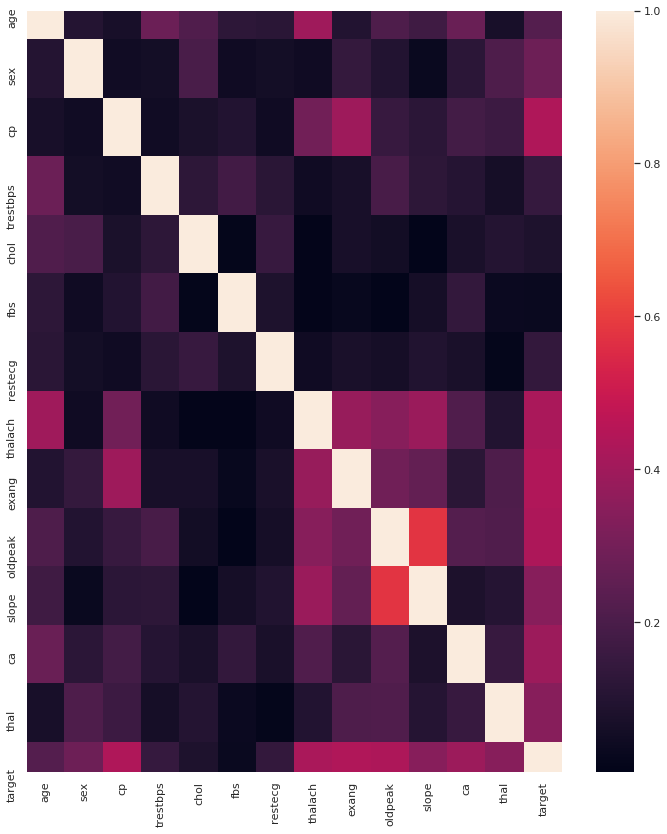

In [3]:
import seaborn as sns

corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [4]:
X = data[data.columns[:-1]]
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8552631578947368

# L1 and L2 regularization

In [6]:
from sklearn.linear_model import Ridge
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    L1_lr = LogisticRegression(C=C,penalty="l1").fit(X_train, y_train)
    print("\nL1 train C={:.3f}: {:.4f}".format(C, L1_lr.score(X_train, y_train)))
    print("L1 test  C={:.3f}: {:.4f}".format(C, L1_lr.score(X_test, y_test)))
    print(L1_lr.coef_)
    
for alpha in [0.001, 1, 100]:
    L2_lr =Ridge(alpha=alpha).fit(X_train, y_train)
    print("\nL2 train alpha={:.3f}: {:.4f}".format(alpha, L2_lr.score(X_train, y_train)))
    print("L2 test  alpha={:.3f}: {:.4f}".format(alpha, L2_lr.score(X_test, y_test)))
    print(L2_lr.coef_)


L1 train C=0.001: 0.5286
L1 test  C=0.001: 0.5921
[[0.         0.         0.         0.         0.         0.
  0.         0.00079703 0.         0.         0.         0.
  0.        ]]

L1 train C=1.000: 0.8370
L1 test  C=1.000: 0.8553
[[ 0.02101617 -1.53225502  0.88271437 -0.03022067 -0.00434025  0.
   0.55683245  0.04219003 -0.49465368 -0.56326463  0.20637277 -0.54680521
  -0.69054366]]

L1 train C=100.000: 0.8326
L1 test  C=100.000: 0.8684
[[ 0.00728261 -1.93815709  0.94022988 -0.03585945 -0.00541945  0.38282839
   0.67528693  0.03588563 -0.81766044 -0.61496754  0.31695765 -0.64056085
  -0.79749171]]

L2 train alpha=0.001: 0.5076
L2 test  alpha=0.001: 0.5106
[ 0.00122462 -0.21131899  0.12065277 -0.00345688 -0.00057155  0.06177593
  0.06341333  0.00424638 -0.11108036 -0.06331846  0.04661107 -0.08332277
 -0.11423417]

L2 train alpha=1.000: 0.5076
L2 test  alpha=1.000: 0.5106
[ 0.00125521 -0.20725602  0.12065848 -0.00345146 -0.0005665   0.05941936
  0.06303671  0.00427024 -0.10926349 

/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Будем обучать 15 линейных регрессий - для каждой максимальной степени полинома. Создадим функцию, которая обучает регрессию, принимая на вход максимальную степень x:

In [48]:
data = pd.read_csv("/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv", sep=',')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [49]:
df = pd.DataFrame(data)
df.rename(columns={'age':'x_1', 'sex':'x_2', 'cp':'x_3', 'trestbps':'x_4',
                  'chol':'x_5', 'fbs':'x_6', 'restecg':'x_7', 'thalach':'x_8',
                  'exang':'x_9', 'oldpeak':'x_10', 'slope':'x_11', 'ca':'x_12',
                  'thal':'x', 'target':'y'}, inplace=True)

In [50]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x,y
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [53]:
from sklearn.preprocessing import scale

X = scale(df[df.columns[:-1]])
y = df["y"]

In [54]:
from sklearn.linear_model import LogisticRegression
#from sklearn import datasets, linear_model

# Create linear regression object
regr = LogisticRegression()

# Train the model using the sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_, "\n")
print('Feature:  Weight:')
      
for feature, coeff in zip(df.columns,regr.coef_.T):
    print(feature, coeff)

Coefficients: 
 [[-0.05345419 -0.7685202   0.84323761 -0.31898231 -0.21818266  0.01325935
   0.23246934  0.50514198 -0.45046022 -0.59968535  0.34376872 -0.75297849
  -0.53119312]] 

Feature:  Weight:
x_1 [-0.05345419]
x_2 [-0.7685202]
x_3 [0.84323761]
x_4 [-0.31898231]
x_5 [-0.21818266]
x_6 [0.01325935]
x_7 [0.23246934]
x_8 [0.50514198]
x_9 [-0.45046022]
x_10 [-0.59968535]
x_11 [0.34376872]
x_12 [-0.75297849]
x [-0.53119312]


/home/akimg/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
from sklearn.linear_model import Lasso, Ridge

# Обучите линейную модель с L1-регуляризацией
regrL = Lasso()

# Train the model using the sets
regrL.fit(X, y)

# The coefficients
print('Coefficients: \n', regrL.coef_)

Coefficients: 
 [-0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0.]


In [56]:
regrR = Ridge()

# Train the model using the sets
regrR.fit(X, y)

# The coefficients
print('Coefficients: \n', regrR.coef_)

Coefficients: 
 [-0.00758621 -0.09094205  0.11583389 -0.03472467 -0.01822259  0.00613131
  0.02614265  0.0689385  -0.06759278 -0.06811293  0.0485411  -0.10246538
 -0.07268169]


In [57]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

for i, a in enumerate(alphas):
    
    regrL = Lasso(alpha=a)

    # Train the model using the sets
    regrL.fit(X, y)

    # The coefficients
    weights=regrL.coef_
    
    for j, weight in enumerate(weights):
        coefs_lasso[i,j]=weight
        
for i, a in enumerate(alphas):
    
    regrR = Ridge(alpha=a)

    # Train the model using the sets
    regrR.fit(X, y)

    # The coefficients
    weights=regrR.coef_
    
    for j, weight in enumerate(weights):
        coefs_ridge[i,j]=weight

Text(0.5, 1.0, 'Ridge')

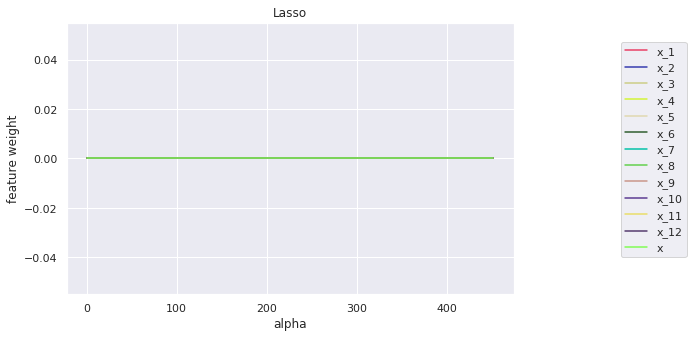

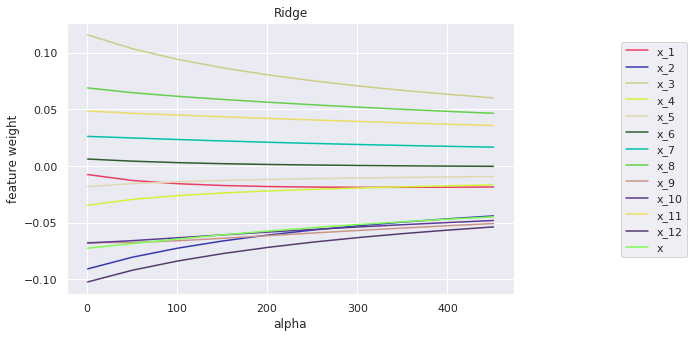

In [58]:
plt.figure(figsize=(8, 5))

colors=[]
for feature in df.columns:
    colors.append(np.random.rand(3))

for coef, feature, color in zip(coefs_lasso.T, df.columns, colors):
    plt.plot(alphas, coef, label=feature, color=color)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature, color in zip(coefs_ridge.T, df.columns,colors):
    plt.plot(alphas, coef, label=feature, color=color)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [39]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
#     #Check if a plot is to be made for the entered power
#     if power in models_to_plot:
#         plt.subplot(models_to_plot[power])
#         plt.tight_layout()
#         plt.plot(data['x'],y_pred)
#         plt.plot(data['x'],data['y'],'.')
#         plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [44]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(df, power=i, models_to_plot=models_to_plot)

KeyError: "['x_13'] not in index"